In [271]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [272]:
#Load the dataset
df = pd.read_csv('daily_offers.csv')
df.shape

(181673, 14)

In [273]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [274]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [275]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [276]:
df.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
9545,AFDB9213-28BB-4340-9030-62811C3BA172,2021-03-19,251.734541,30353979.0,26.0,Won,PL,10.0,1.0,1510.0,52100206,164141591,2021-07-01,1021.0
41789,299C0F30-8DD1-4DA7-94FD-CB9E705F17E5,2021-02-10,62.695562,30334107.0,78.0,Lost,S,10.0,6.0,2000.0,NaN,640665,2021-05-01,845.0
127107,07668FD5-4F74-4461-AF20-696259F56513,2020-10-08,5.691398,30202938.0,25.0,Won,W,41.0,3.0,1230.0,103100,1670798778,2020-10-01,604.0


In [277]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


<AxesSubplot:xlabel='width'>

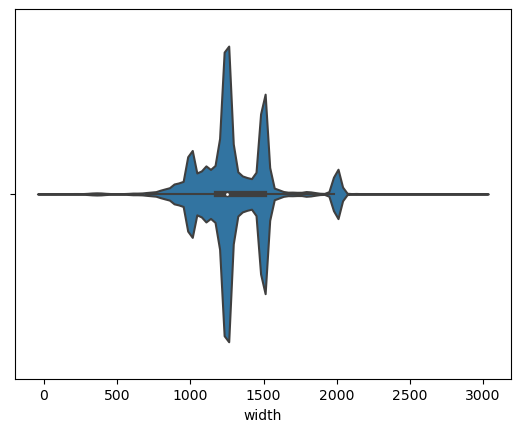

In [278]:
sns.violinplot(x=df["width"])

<AxesSubplot:xlabel='application'>

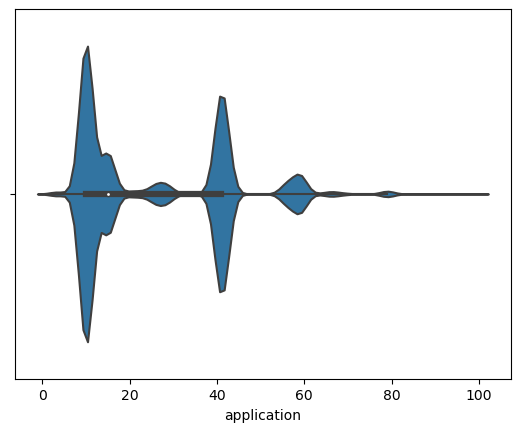

In [279]:
sns.violinplot(x=df["application"])

<AxesSubplot:xlabel='country'>

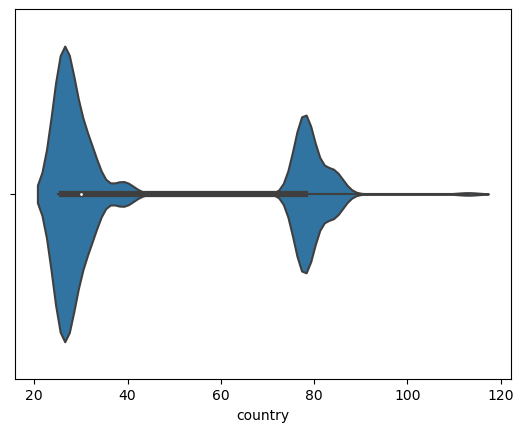

In [280]:
sns.violinplot(x=df["country"])

# Exploratory data Analysis (EDA)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [282]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [283]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data. 
df['material_ref'].fillna('unknown', inplace=True)

In [284]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [285]:
# deleting null values.
df = df.dropna()

<AxesSubplot:>

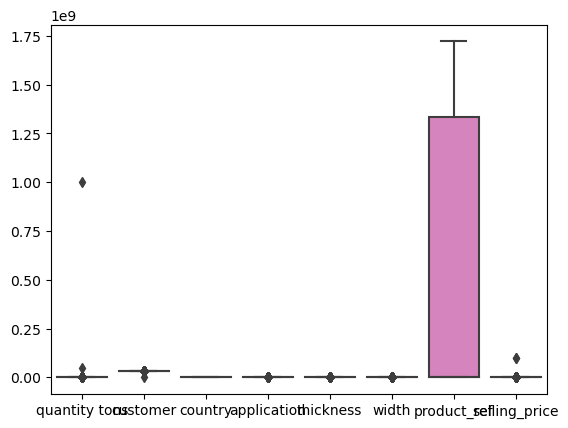

In [286]:
#draw boxplot
sns.boxplot(data = df)

In [287]:
dfr=df.copy()

In [288]:
a = dfr['selling_price'] <= 0
print(a.sum())
dfr.loc[a, 'selling_price'] = np.nan

a = dfr['quantity tons'] <= 0
print(a.sum())
dfr.loc[a, 'quantity tons'] = np.nan

a = dfr['thickness'] <= 0
print(a.sum())

7
4
0


In [289]:
dfr.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

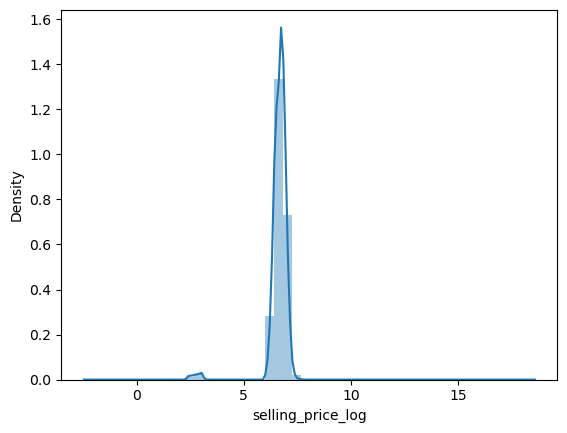

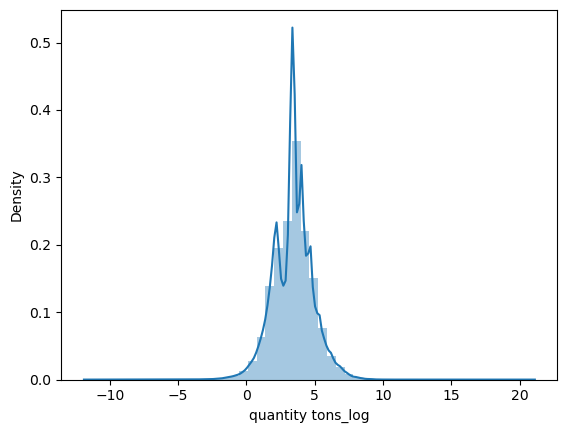

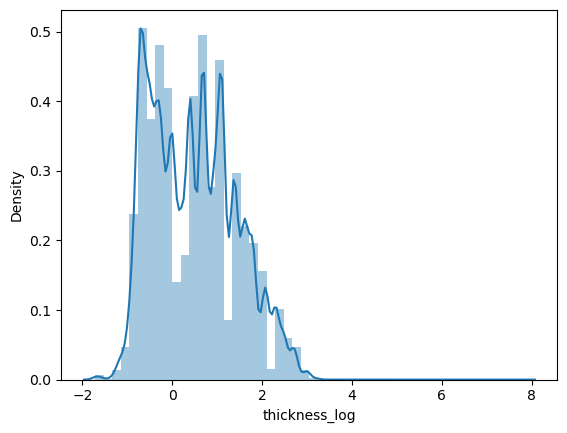

In [290]:
dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'])
plt.show()

dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'])
plt.show()

dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'])
plt.show()
# reverts log
# sns.distplot(df_p['reverted_values'])

In [291]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
dfr.status = OE.fit_transform(dfr[['status']])
dfr['item type'] = OE.fit_transform(dfr[['item type']])

In [292]:
dfr = dfr.dropna()

In [293]:
#Regression

In [294]:
#split data into X, y
X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfr['selling_price_log']

In [295]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [296]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [297]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [298]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08464529095644646
0.07805457012061678


In [299]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8736436626286413
0.8867180545575358


In [300]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7627437653996635
0.7738696934709421


In [301]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [302]:
#check metrics
from sklearn import metrics

In [303]:
#check MSE
metrics.mean_squared_error(y_test,y_pred)

0.025959044730380337

In [304]:
#check MAE
metrics.mean_absolute_error(y_test, y_pred)

0.11676921827129697

In [305]:
#R2 Score
print(metrics.r2_score(y_test,y_pred))

0.919895201643208


In [306]:
#Classification

In [307]:
df.status.value_counts()

Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [308]:
dfc = df.copy()

In [309]:
dfc = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

150435

In [310]:
dfc.status.value_counts()

Won     116004
Lost     34431
Name: status, dtype: int64

In [311]:
#use ordinal encoder to convert categorical data into numerical data
OE = OrdinalEncoder()
dfc.status = OE.fit_transform(dfc[['status']])
dfc['item type'] = OE.fit_transform(dfc[['item type']])

In [312]:
#split data into X, y
X = dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dfc['status']

In [313]:
#apply standard scaler
SS.fit_transform(X)

array([[-0.09139439,  0.09705592,  0.76978981, ..., -0.71017265,
        -0.72507203,  1.6673573 ],
       [ 1.52755772,  0.76054292,  0.76978981, ..., -0.83268141,
        -0.2835426 ,  1.66443363],
       [ 0.66147626, -0.62373848,  1.72295071, ..., -0.62850015,
        -0.74727633, -0.66115687],
       ...,
       [-0.20459491, -0.71081685,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [-4.74988274, -0.77269647,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041],
       [ 0.70809988, -0.75206993,  0.76978981, ..., -0.83268141,
        -0.30327554, -0.43319041]])

In [314]:
#split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105304, 9)
(45131, 9)
(105304,)
(45131,)


In [315]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [316]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.8093139861733647
0.8112827103321442


In [317]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9220352503228747
0.8905851853493164


In [318]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8192091468510218
0.8206554253174093


In [319]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8212983362455367
0.821940572998604


In [320]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.7716895844412368
0.7698034610356518


In [321]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

[11:06:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.6075002975904351

In [322]:
y_predict = xgb_model.predict(X_test)

In [323]:
mean_squared_error(y_test, y_predict)

0.07711276831248857

In [324]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [325]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9309565487137444


In [326]:
knn.predict(X_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [327]:
y_pred= knn.predict(X_test)

In [329]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8209,  2180],
       [ 2758, 31984]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

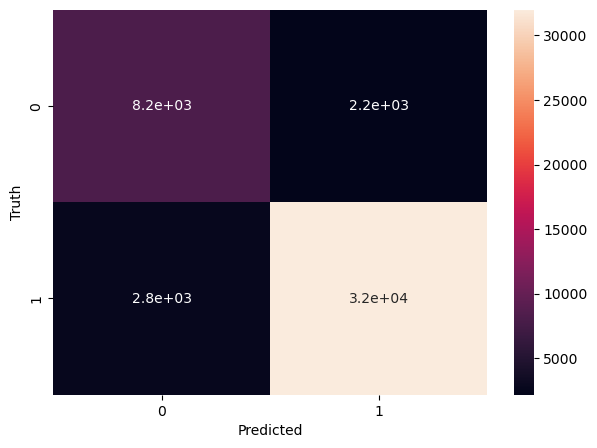

In [330]:
#draw heatmap
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [331]:
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix,classification_report, roc_curve, auc

In [332]:
#check accuracy score.
accuracy_score(y_test, y_pred)

0.8905851853493164

In [333]:
f1_score(y_test,y_pred, average = 'macro')

0.8485570397412172

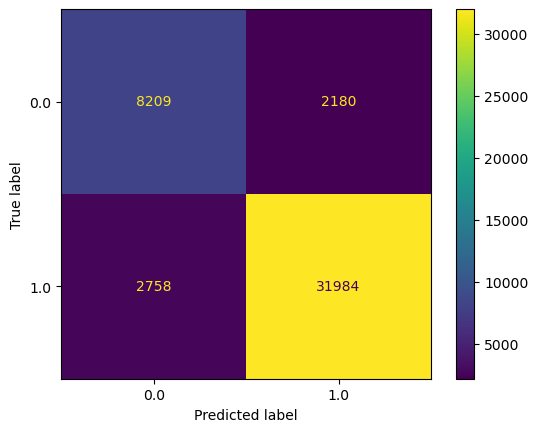

In [334]:
plot_confusion_matrix(knn, X_test, y_test);

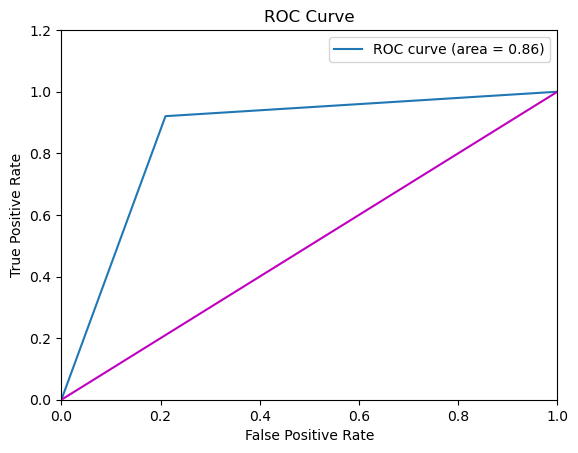

In [335]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [336]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     10389
         1.0       0.94      0.92      0.93     34742

    accuracy                           0.89     45131
   macro avg       0.84      0.86      0.85     45131
weighted avg       0.89      0.89      0.89     45131

